In [1]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd
import emoji
import demoji

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
demoji.download_codes()

... OK (Got response in 0.56 seconds)
Writing emoji data to C:\Users\Cedric L\.demoji\codes.json ...
... OK


In [3]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        tweet = demoji.replace_with_desc(tweet,sep='*')
   
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [4]:
df = pd.read_csv('f4.csv')

In [5]:
text = list(df['tweet'])

In [6]:
import time
t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 9 seconds


In [7]:
text

["iPhone 12 review: Should you upgrade to Apple's latest smartphone? Maybe \n#Apple #iPhone12 #iphone12pro \nhttps://t.co/y5AMNEiUfG  \n\nPROTECT YOUR DEVICE WITH #whitestonedomeglass\nPREMIUM GLASS SCREEN PROTECTOR\n\nSHOP NOW\nhttps://t.co/twy41vMv6C https://t.co/3pllsueMw6",
 'As a movement against e-waste, @Apple has decided to remove its brick charger and EarPods from the iPhone 12 setup, encouraging customers to reuse the accessories they already own. \n\nIs Apple truly concerned about reducing e-waste, or is this simply a PR distraction?\n#iphone12 https://t.co/0nTjflPqGK',
 'For the first time #Apple is allowing trade-ins to be processed via its carrier partners, so consumers can get the benefit of the best possible #MobileTradeIn offers. Learn more in our latest blog: https://t.co/mmkGUTCHtn\n#iPhone12 #5G',
 '@Apple It better not be a new iPhone... i just ordered the iPhone12 max pro. https://t.co/7tlJ7BpnXX',
 "#Tech: The iPhone 12 comes with a bunch of new upgrades and feat

In [8]:
processedtext

['iphone 12 review should you upgrade to apple latest smartphone maybe apple iphone12 iphone12pro URL protect your device with whitestonedomeglass premium glass screen protector shop now URL URL ',
 'a movement against waste USER ha decided to remove it brick charger and earpods from the iphone 12 setup encouraging customer to reuse the accessory they already own is apple truly concerned about reducing waste or is this simply pr distraction iphone12 URL ',
 'for the first time apple is allowing trade in to be processed via it carrier partner so consumer can get the benefit of the best possible mobiletradein offer learn more in our latest blog URL 5g ',
 'USER it better not be new iphone just ordered the iphone12 max pro URL ',
 'tech the iphone 12 come with bunch of new upgrade and feature here the in depth review by USER iphone12 technology USER URL URL ',
 'iphone 12 mini review is here did you like iphone12 mini or if you like this iphone 12 mini so use the tag iphone mini india iph

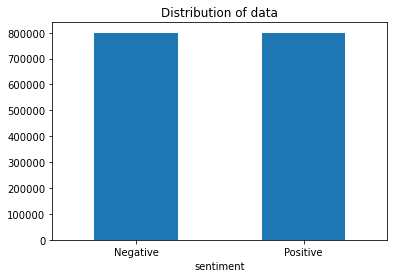

In [9]:
# Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('training1.csv',
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

# Removing the unnecessary columns.
dataset = dataset[['sentiment','text']]
# Replacing the values to ease understanding.
dataset['sentiment'] = dataset['sentiment'].replace(4,1)

# Plotting the distribution for dataset.
ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

In [10]:
import time
t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 622 seconds


In [11]:
text

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ',
 "spring break in plain city... it's snowing ",
 'I just re-pierced my ears ',
 "@caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . .",
 '@octolinz16 It it counts, idk why I did either. you never talk to me anymore ',
 "@smarrison i wo

In [12]:
processedtext

['USER URL aww that bummer you shoulda got david carr of third day to do it ',
 'is upset that he can update his facebook by texting it and might cry a result school today also blah ',
 'USER dived many time for the ball managed to save 50 the rest go out of bound ',
 'my whole body feel itchy and like it on fire ',
 'USER no it not behaving at all mad why am here because can see you all over there ',
 'USER not the whole crew ',
 'need hug ',
 'USER hey long time no see yes rain bit only bit lol fine thanks how you ',
 'USER nope they didn have it ',
 'USER que me muera ',
 'spring break in plain city it snowing ',
 'just re pierced my ear ',
 'USER couldn bear to watch it and thought the ua loss wa embarrassing ',
 'USER it it count idk why did either you never talk to me anymore ',
 'USER would ve been the first but didn have gun not really though zac snyder just doucheclown ',
 'USER wish got to watch it with you miss you and USER how wa the premiere ',
 'hollis death scene will hu

In [13]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [14]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  3437799


In [15]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [16]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80     39989
           1       0.80      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



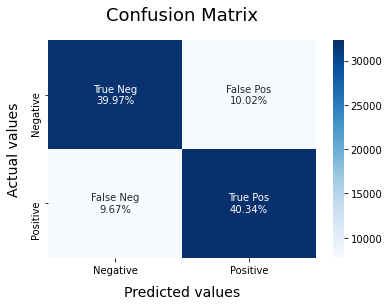

In [17]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     39989
           1       0.83      0.83      0.83     40011

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



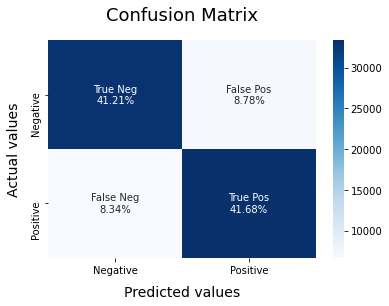

In [18]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

In [19]:
#save the model with pickle

file = open('vectoriser-ngram.pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

file = open('Sentiment-BNB.pickle','wb')
pickle.dump(BNBmodel, file)
file.close()